___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from scipy.stats import norm, skew
from scipy import stats

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab
import matplotlib

%matplotlib inline
color = sns.color_palette()
#import matplotlib.ticker as mtick
from IPython.display import display

pd.options.display.max_columns = None
#from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option(
    'display.float_format',
    lambda x: '%.3f' % x)  # pd.options.display.float_format = '{:,.2f}'.format

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# """
# load data(reduce memory usage)
# https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# """

# # import pandas as pd
# # import numpy as np


# def reduce_mem_usage(df):
#     """ iterate through all the columns of a dataframe and modify the data type
#         to reduce memory usage.        
#     """
#     start_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

#     for col in df.columns:
#         col_type = df[col].dtype

#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(
#                         np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(
#                         np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(
#                         np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(
#                         np.int64).max:
#                     df[col] = df[col].astype(np.int64)
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(
#                         np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(
#                         np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#         else:
#             df[col] = df[col].astype('category')

#     end_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) /
#                                         start_mem))

#     return df


# def import_data(file):
#     """create a dataframe and optimize its memory usage"""
#     df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
#     df = reduce_mem_usage(df)
#     return df

In [3]:
# data_file = 'creditcard.csv'
# df0 = import_data(data_file)
# df = df0.copy()

# df.head()

In [4]:
data_file = 'creditcard.csv'
df0 = pd.read_csv(data_file)
df = df0.copy()

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,-0.915,-1.040,-0.032,-0.188,-0.084,0.041,-0.303,-0.660,0.167,-0.256,0.383,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
df["Class"].value_counts(normalize=True)

0   0.998
1   0.002
Name: Class, dtype: float64

## Apply Data Integrity Checks
* [Docs](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html)
* [Deepcheck - Data Integrity Validation](https://medium.com/@ptannor/new-open-source-for-validating-and-testing-machine-learning-86bb9c575e71)
* [Deepcheck - Medium](https://analyticsindiamag.com/testing-and-validating-machine-learning-models-and-data-with-deepchecks/)

In [9]:
# import sys
# !{sys.executable} -m pip install deepchecks -U --quiet

## Restart your kernel after this code cell executed.
## And then try to run creating 'ds' code cell first. If it doesnt work pay attention to Warning showed and pip install packages

Use cmd to install Jupyter Client
[GitHub](https://github.com/jupyter/jupyter_client)

In [10]:
## Jupyter Cleint Installation
## !cd C:///Users/Mustafa/Desktop/Clarusway Dosyalar/DS Capstone Projects/3_DS_Capstone_Projects_(Fraud Detection)
# !git clone https://github.com/jupyter/jupyter_client.git

In [11]:
# !pip install PyQtWebEngine==5.12.1
# !pip install PyQt5==5.12.3
# !pip install "python-lsp-server[all]==1.2.4"
# #!pip install python-lsp-server==1.2.4
# #!pip install -U setuptools

In [12]:
from deepchecks.tabular import Dataset

ds = Dataset(df, label= 'Class', label_type="multiclass")  # , datetime_name='Time'
                # , cat_features= ['col'], label_type="multiclass" or label_type="regression"

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [13]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_LL6B21LSX763735R15EAVM0XX">Data I…

In [14]:
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

IsSingleValue().run(ds)

In [15]:
# we can also add a condition:
single_value_with_condition = IsSingleValue().add_condition_not_single_value()
result = single_value_with_condition.run(ds)
result.show()

In [16]:
# We can also inspect and use the result's value:
result.value

{'Time': 124592,
 'V1': 275663,
 'V2': 275663,
 'V3': 275663,
 'V4': 275663,
 'V5': 275663,
 'V6': 275663,
 'V7': 275663,
 'V8': 275663,
 'V9': 275663,
 'V10': 275663,
 'V11': 275663,
 'V12': 275663,
 'V13': 275663,
 'V14': 275663,
 'V15': 275663,
 'V16': 275663,
 'V17': 275663,
 'V18': 275663,
 'V19': 275663,
 'V20': 275663,
 'V21': 275663,
 'V22': 275663,
 'V23': 275663,
 'V24': 275663,
 'V25': 275663,
 'V26': 275663,
 'V27': 275663,
 'V28': 275663,
 'Amount': 32767,
 'Class': 2}

In [17]:
# # Alternatively we can fix the dataframe directly, and create a new dataset.
# # Let's fix also the duplicate values:
# df.drop_duplicates(inplace=True)
# df.drop('Class', axis=1, inplace=True)
# ds = Dataset(df, datetime_name='Time', label='Class')  # , cat_features=[]
# result = DataDuplicates().add_condition_ratio_less_or_equal(0).run(ds)
# result.show()

In [18]:
# let's inspect the suite's structure
integ_suite

Data Integrity Suite: [
	0: IsSingleValue
		Conditions:
			0: Does not contain only a single value
	1: SpecialCharacters
		Conditions:
			0: Ratio of samples containing solely special character is less or equal to 0.1%
	2: MixedNulls
		Conditions:
			0: Number of different null types is less or equal to 1
	3: MixedDataTypes
		Conditions:
			0: Rare data types in column are either more than 10% or less than 1% of the data
	4: StringMismatch
		Conditions:
			0: No string variants
	5: DataDuplicates
		Conditions:
			0: Duplicate data ratio is less or equal to 0%
	6: StringLengthOutOfBounds
		Conditions:
			0: Ratio of string length outliers is less or equal to 0%
	7: ConflictingLabels
		Conditions:
			0: Ambiguous sample ratio is less or equal to 0%
	8: OutlierSampleDetection
	9: FeatureLabelCorrelation(ppscore_params={}, random_state=42)
		Conditions:
			0: Features' Predictive Power Score is less than 0.8
	10: FeatureFeatureCorrelation
		Conditions:
			0: Not more than 0 pairs are corre

In [19]:
# # and remove the condition:
# integ_suite[3].clean_conditions()

In [20]:
# res = integ_suite.run(ds)

### Exploratory Data Analysis

In [21]:
df_PCA = df[df.columns[1:29]]

In [22]:
df_PCA.describe().T.style.background_gradient(subset=['mean'], cmap='Blues')\
                                        .background_gradient(subset=['std'], cmap='Reds')  # .format('{:.4f}')

,count,mean,std,min,25%,50%,75%,max
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,-0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,-0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.000000,0.000000,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [23]:
df[df["Class"] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.000,-2.312,1.952,-1.610,3.998,-0.522,-1.427,-2.537,1.392,-2.770,-2.772,3.202,-2.900,-0.595,-4.289,0.390,-1.141,-2.830,-0.017,0.417,0.127,0.517,-0.035,-0.465,0.320,0.045,0.178,0.261,-0.143,0.000,1
623,472.000,-3.044,-3.157,1.088,2.289,1.360,-1.065,0.326,-0.068,-0.271,-0.839,-0.415,-0.503,0.677,-1.692,2.001,0.667,0.600,1.725,0.283,2.102,0.662,0.435,1.376,-0.294,0.280,-0.145,-0.253,0.036,529.000,1
4920,4462.000,-2.303,1.759,-0.360,2.330,-0.822,-0.076,0.562,-0.399,-0.238,-1.525,2.033,-6.560,0.023,-1.470,-0.699,-2.282,-4.782,-2.616,-1.334,-0.430,-0.294,-0.932,0.173,-0.087,-0.156,-0.543,0.040,-0.153,239.930,1
6108,6986.000,-4.398,1.358,-2.593,2.680,-1.128,-1.707,-3.496,-0.249,-0.248,-4.802,4.896,-10.913,0.184,-6.771,-0.007,-7.358,-12.598,-5.132,0.308,-0.172,0.574,0.177,-0.436,-0.054,0.252,-0.657,-0.827,0.850,59.000,1
6329,7519.000,1.234,3.020,-4.305,4.733,3.624,-1.358,1.713,-0.496,-1.283,-2.447,2.101,-4.610,1.464,-6.079,-0.339,2.582,6.739,3.042,-2.722,0.009,-0.379,-0.704,-0.657,-1.633,1.489,0.567,-0.010,0.147,1.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.000,-1.928,1.126,-4.518,1.749,-1.566,-2.010,-0.883,0.697,-2.065,-5.588,2.116,-5.417,-1.235,-6.665,0.402,-2.898,-4.571,-1.315,0.391,1.253,0.779,-0.319,0.639,-0.295,0.538,0.788,0.293,0.148,390.000,1
280143,169347.000,1.379,1.289,-5.004,1.412,0.443,-1.327,-1.413,0.249,-1.127,-3.232,2.858,-3.097,-0.793,-5.210,-0.614,-2.155,-3.267,-0.689,0.738,0.226,0.371,0.028,-0.146,-0.081,0.522,0.739,0.389,0.187,0.760,1
280149,169351.000,-0.676,1.126,-2.214,0.468,-1.121,-0.003,-2.235,1.210,-0.652,-3.464,1.795,-2.775,-0.419,-4.057,-0.713,-1.603,-5.035,-0.507,0.266,0.248,0.752,0.834,0.191,0.032,-0.740,0.471,0.385,0.194,77.890,1
281144,169966.000,-3.114,0.586,-5.400,1.817,-0.841,-2.944,-2.208,1.059,-1.632,-5.246,1.934,-5.030,-1.127,-6.417,0.141,-2.549,-4.615,-1.478,-0.035,0.306,0.583,-0.269,-0.456,-0.184,-0.328,0.606,0.885,-0.254,245.000,1


In [24]:
print("The Number of Duplicated Rows : ", df.duplicated().sum())

The Number of Duplicated Rows :  1081


In [25]:
print("Duplicated Data: %",
      (df.duplicated().sum() / df.shape[0] * 100).round(2))

Duplicated Data: % 0.38


In [26]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.000,-0.530,0.874,1.347,0.145,0.414,0.100,0.711,0.176,-0.287,-0.485,0.872,0.852,-0.572,0.101,-1.520,-0.284,-0.311,-0.404,-0.823,-0.290,0.047,0.208,-0.186,0.001,0.099,-0.553,-0.073,0.023,6.140,0
35,26.000,-0.535,0.865,1.351,0.148,0.434,0.087,0.693,0.180,-0.286,-0.482,0.872,0.853,-0.572,0.102,-1.520,-0.286,-0.310,-0.404,-0.824,-0.283,0.050,0.207,-0.187,0.001,0.098,-0.553,-0.078,0.025,1.770,0
113,74.000,1.038,0.127,0.184,1.110,0.442,0.945,-0.037,0.351,0.119,-0.243,0.578,0.675,-0.534,0.447,1.123,-1.768,1.241,-2.449,-1.747,-0.336,0.103,0.605,0.023,-0.626,0.479,-0.167,0.081,0.001,1.180,0
114,74.000,1.038,0.127,0.184,1.110,0.442,0.945,-0.037,0.351,0.119,-0.243,0.578,0.675,-0.534,0.447,1.123,-1.768,1.241,-2.449,-1.747,-0.336,0.103,0.605,0.023,-0.626,0.479,-0.167,0.081,0.001,1.180,0
115,74.000,1.038,0.127,0.184,1.110,0.442,0.945,-0.037,0.351,0.119,-0.243,0.578,0.675,-0.534,0.447,1.123,-1.768,1.241,-2.449,-1.747,-0.336,0.103,0.605,0.023,-0.626,0.479,-0.167,0.081,0.001,1.180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.000,1.913,-0.455,-1.751,0.454,2.089,4.160,-0.881,1.082,1.023,0.005,-0.542,0.745,-0.375,-0.068,-0.796,-0.498,-0.134,-1.005,0.086,-0.208,-0.524,-1.338,0.474,0.617,-0.284,-1.085,0.073,-0.036,11.990,0
283483,171627.000,-1.464,1.368,0.816,-0.601,-0.689,-0.487,-0.304,0.885,0.054,-0.828,-1.193,0.945,1.373,-0.036,-0.209,0.320,-0.205,-0.025,-0.469,0.032,0.287,0.948,-0.219,0.083,0.044,0.639,0.214,0.119,6.820,0
283485,171627.000,-1.458,1.378,0.812,-0.604,-0.712,-0.472,-0.283,0.881,0.053,-0.831,-1.192,0.943,1.373,-0.038,-0.208,0.322,-0.206,-0.025,-0.468,0.024,0.284,0.950,-0.217,0.083,0.045,0.640,0.219,0.117,11.930,0
284191,172233.000,-2.668,3.161,-3.356,1.008,-0.377,-0.110,-0.667,2.310,-1.639,-1.450,-0.509,0.600,-0.627,1.017,-0.887,0.420,1.856,1.315,1.096,-0.822,0.391,0.267,-0.080,-0.096,0.087,-0.451,-1.184,-0.222,55.660,0


In [27]:
df[(df.duplicated()) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.000,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,4.407,-4.611,-1.909,-9.073,-0.226,-6.212,-6.248,-3.149,0.052,-3.493,27.203,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1.000,1
102443,68207.000,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,4.407,-4.611,-1.909,-9.073,-0.226,-6.212,-6.248,-3.149,0.052,-3.493,27.203,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1.000,1
102444,68207.000,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,4.407,-4.611,-1.909,-9.073,-0.226,-6.212,-6.248,-3.149,0.052,-3.493,27.203,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1.000,1
102445,68207.000,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,4.407,-4.611,-1.909,-9.073,-0.226,-6.212,-6.248,-3.149,0.052,-3.493,27.203,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1.000,1
102446,68207.000,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,4.407,-4.611,-1.909,-9.073,-0.226,-6.212,-6.248,-3.149,0.052,-3.493,27.203,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1.000,1
141258,84204.000,-0.938,3.463,-6.445,4.932,-2.234,-2.292,-5.696,1.339,-4.322,-8.099,7.183,-9.446,-0.315,-12.991,-0.136,-6.368,-12.734,-3.845,1.008,1.130,1.067,-0.522,-0.320,-0.406,0.907,1.166,1.374,0.730,0.000,1
141260,84204.000,-1.927,1.828,-7.019,5.348,-2.739,-2.107,-5.016,1.206,-4.383,-8.338,7.190,-9.425,-0.223,-12.875,-0.072,-6.300,-12.719,-3.740,0.844,2.173,1.377,-0.792,-0.771,-0.380,0.719,1.111,1.278,0.819,512.250,1
143334,85285.000,-7.030,3.422,-9.525,5.271,-4.025,-2.866,-6.989,3.792,-4.623,-8.410,6.309,-8.577,0.247,-11.534,-0.364,-5.452,-11.888,-3.564,0.876,0.546,1.103,-0.542,0.037,-0.356,0.354,1.042,1.360,-0.272,0.000,1
143336,85285.000,-6.713,3.921,-9.747,5.148,-5.152,-2.099,-5.938,3.579,-4.685,-8.538,6.349,-8.682,0.251,-11.608,-0.352,-5.364,-11.939,-3.584,0.897,0.136,0.954,-0.451,0.127,-0.339,0.394,1.075,1.650,-0.395,252.920,1
150661,93853.000,-6.186,7.103,-13.030,8.011,-7.885,-3.975,-12.230,4.971,-4.248,-12.965,8.688,-17.183,0.070,-14.116,0.959,-12.375,-18.717,-6.522,3.518,0.484,2.503,0.482,0.481,0.360,-0.293,-0.199,-0.204,0.399,44.900,1


In [28]:
# This DataFrame is going to be df version "not duplicated" of "not Fraud" transaction

df2 = df.copy()

In [29]:
dupl_not_frauds_idx = df2[(df2.duplicated()) & (df2["Class"] == 0)].index

In [30]:
df2.drop(index=dupl_not_frauds_idx, inplace=True)
df2 = df2.reset_index(drop=True)
df2.shape

(283745, 31)

In [31]:
cols = list(df2[df2.columns[1:29]])
cols.append("Class")

In [32]:
df2[cols].corr().style.background_gradient(#subset=['Class'],
                                           cmap='Reds',
                                           vmin=df[cols].corr()["Class"].min(),
                                           vmax=df[cols].corr()["Class"].max())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V1,1.000000,0.003966,-0.003030,0.000323,-0.003821,0.000419,-0.002335,0.003225,0.003657,0.005963,-0.001113,0.002544,-0.000281,0.000940,-0.000130,0.000190,0.002089,-0.001202,0.000620,-0.001283,-0.000372,-0.000691,-0.002451,-0.000718,-0.000070,-0.000446,-0.013074,-0.004465,-0.102031
V2,0.003966,1.000000,0.001070,0.000156,0.002596,-0.000436,0.001493,-0.001847,-0.001724,-0.003629,0.001321,-0.001269,0.000376,-0.000746,0.001189,0.000818,-0.001612,0.000450,-0.000073,-0.001563,-0.000644,0.000098,-0.002599,0.000650,-0.001639,0.000086,0.005823,0.001507,0.091689
V3,-0.003030,0.001070,1.000000,-0.000470,-0.001775,-0.000942,-0.001643,0.002311,-0.000440,-0.001009,-0.001379,0.001387,0.000391,0.003311,-0.000527,0.001544,0.001618,0.000398,-0.000732,-0.002382,0.000717,0.000065,-0.000633,-0.000161,0.000632,0.000146,-0.002950,0.000596,-0.193538
V4,0.000323,0.000156,-0.000470,1.000000,-0.000311,-0.001245,0.000713,-0.000223,0.000822,-0.000882,0.000567,-0.000085,0.000101,-0.000417,0.000317,0.000559,-0.000940,0.000561,-0.000139,0.000340,0.000254,-0.000055,0.001074,-0.000076,0.000120,0.000770,-0.000006,0.000009,0.133836
V5,-0.003821,0.002596,-0.001775,-0.000311,1.000000,-0.000534,-0.002371,0.003653,0.000757,-0.000576,-0.001881,0.002262,0.000179,0.002799,-0.000730,0.001401,0.001712,-0.000212,-0.000063,-0.001300,0.000336,-0.000527,0.000580,0.000111,0.000249,0.000577,-0.003025,-0.000284,-0.095262
V6,0.000419,-0.000436,-0.000942,-0.001245,-0.000534,1.000000,0.000345,0.000278,-0.000310,-0.001266,-0.000596,-0.000139,0.000233,0.000774,-0.000437,0.000664,-0.000462,0.000907,-0.000133,-0.000538,0.000562,0.000104,-0.000063,0.001086,0.000732,-0.000092,0.000849,0.001228,-0.043688
V7,-0.002335,0.001493,-0.001643,0.000713,-0.002371,0.000345,1.000000,0.003164,-0.001303,-0.003217,-0.002079,0.002294,0.000453,0.003979,-0.000524,0.001487,0.002786,0.000517,0.000139,-0.000832,0.001172,-0.000338,0.000802,-0.000337,0.000163,0.001034,0.000094,0.002139,-0.187792
V8,0.003225,-0.001847,0.002311,-0.000223,0.003653,0.000278,0.003164,1.000000,0.001492,0.003308,0.002921,-0.002946,-0.000187,-0.004690,0.001370,-0.001355,-0.002771,0.000397,-0.000148,0.002312,-0.000340,0.000243,-0.000001,0.000725,-0.000136,-0.000985,0.000339,-0.001413,0.020028
V9,0.003657,-0.001724,-0.000440,0.000822,0.000757,-0.000310,-0.001303,0.001492,1.000000,-0.009082,-0.001678,0.000533,0.000787,0.004400,0.000010,0.002136,0.001623,0.001133,-0.000023,-0.002145,0.001132,0.000428,0.000570,-0.000160,-0.000197,0.001292,0.009928,0.005974,-0.098061
V10,0.005963,-0.003629,-0.001009,-0.000882,-0.000576,-0.001266,-0.003217,0.003308,-0.009082,1.000000,-0.003354,0.001350,0.001587,0.007301,-0.001592,0.002945,0.003195,0.001852,0.000097,-0.004758,0.002068,-0.000586,0.001130,0.000014,-0.000360,0.001244,0.014952,0.009930,-0.218691


In [33]:
# Checking multicollinearity

df2[cols].corr()[abs(df2[cols].corr()) > 0.85]["Class"].count() - 1
# Self Correlation subtracted which is 1.00 (> 0.85)

0

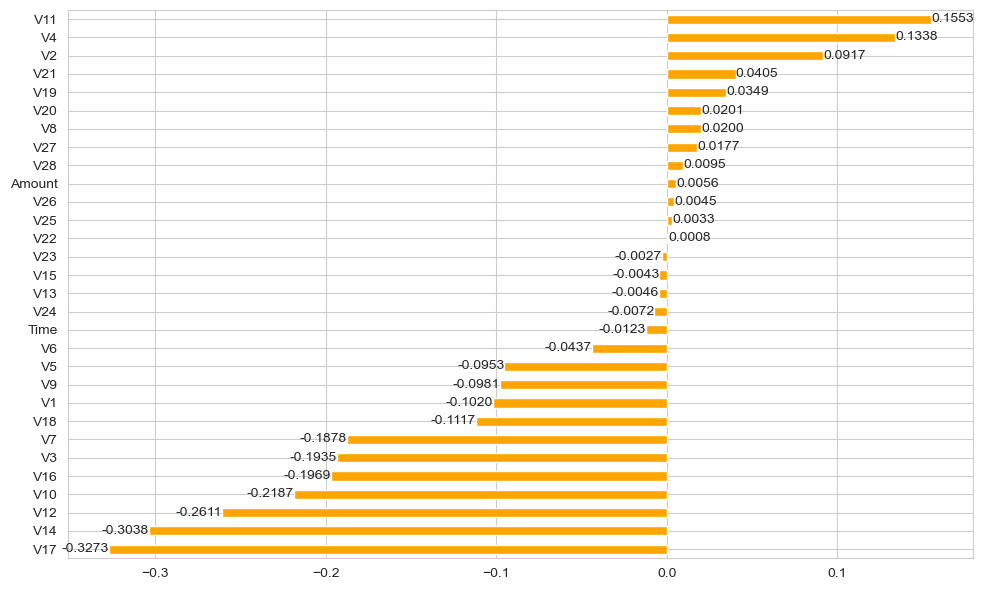

In [34]:
ax = df2.corr()["Class"][:-1].sort_values().plot(kind="barh", color="orange")
ax.bar_label(ax.containers[0], fmt="%.4f")

plt.tight_layout()
plt.show()

In [35]:
df2.corr()["Amount"].drop("Amount").sort_values()

V2      -0.533
V5      -0.387
V1      -0.230
V3      -0.211
V23     -0.113
V8      -0.103
V10     -0.102
V22     -0.065
V19     -0.056
V25     -0.048
V9      -0.044
Time    -0.011
V12     -0.009
V16     -0.004
V26     -0.003
V15     -0.003
V11      0.000
V24      0.005
V13      0.005
Class    0.006
V17      0.008
V28      0.010
V27      0.028
V14      0.034
V18      0.036
V4       0.099
V21      0.106
V6       0.216
V20      0.341
V7       0.398
Name: Amount, dtype: float64

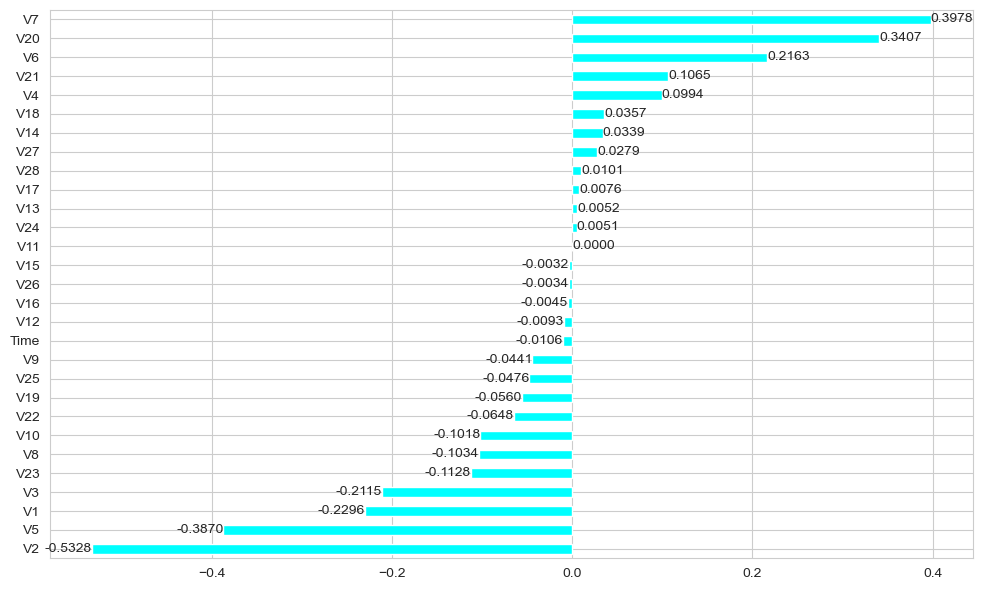

In [36]:
ax = df2.corr()["Amount"][:-2].sort_values().plot(kind="barh", color="cyan")
ax.bar_label(ax.containers[0], fmt="%.4f")

plt.tight_layout()
plt.show()

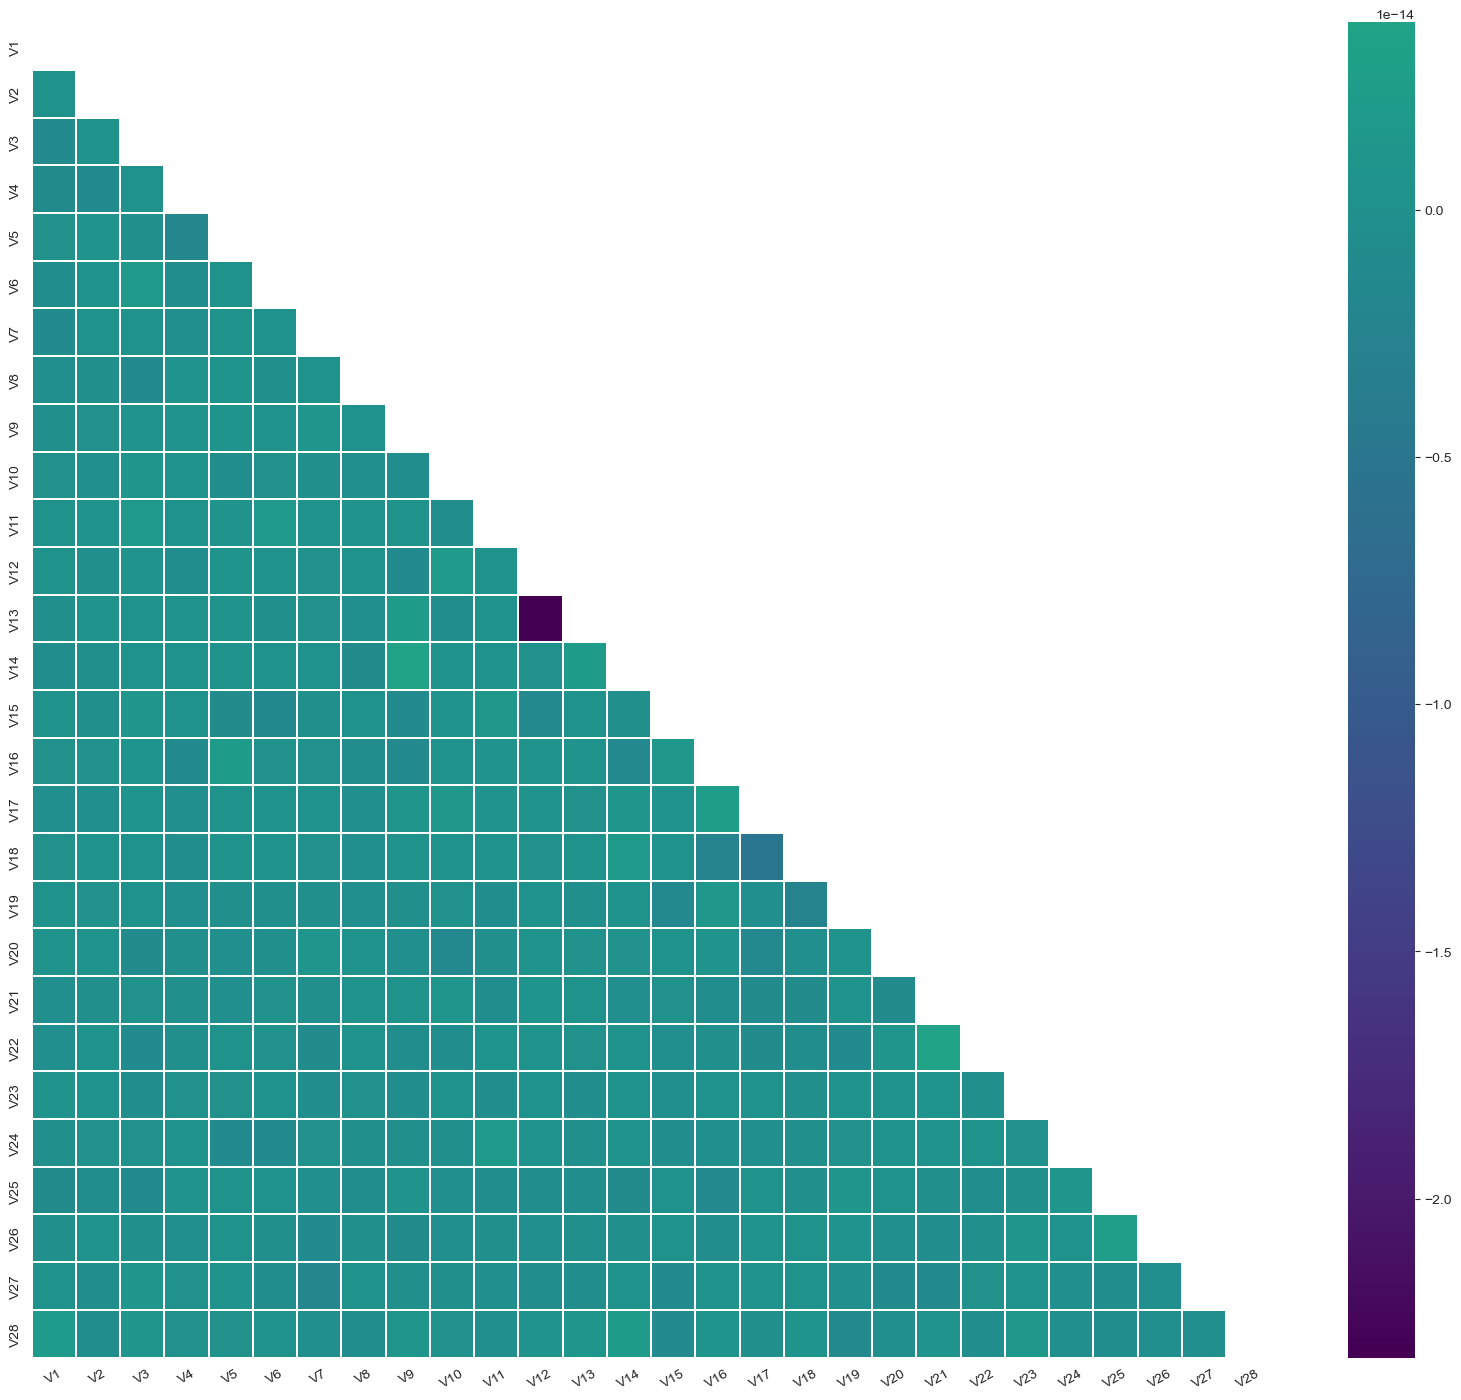

In [37]:
plt.figure(figsize=(16, 14))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_PCA.corr())

# using the upper triangle matrix as mask
sns.heatmap(
    df_PCA.corr(),
    annot=False,
    cmap="viridis",
    mask=matrix,
    #fmt='.3g',
    center=0,
    linewidths=0.1,
    linecolor='white')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [38]:
print(f"Columns: {df2.columns[[0, 29, 30]]} \n\n {df2.columns[1:29]}")

Columns: Index(['Time', 'Amount', 'Class'], dtype='object') 

 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


### Data Cleaning
Check Missing Values and Outliers

In [39]:
df2.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

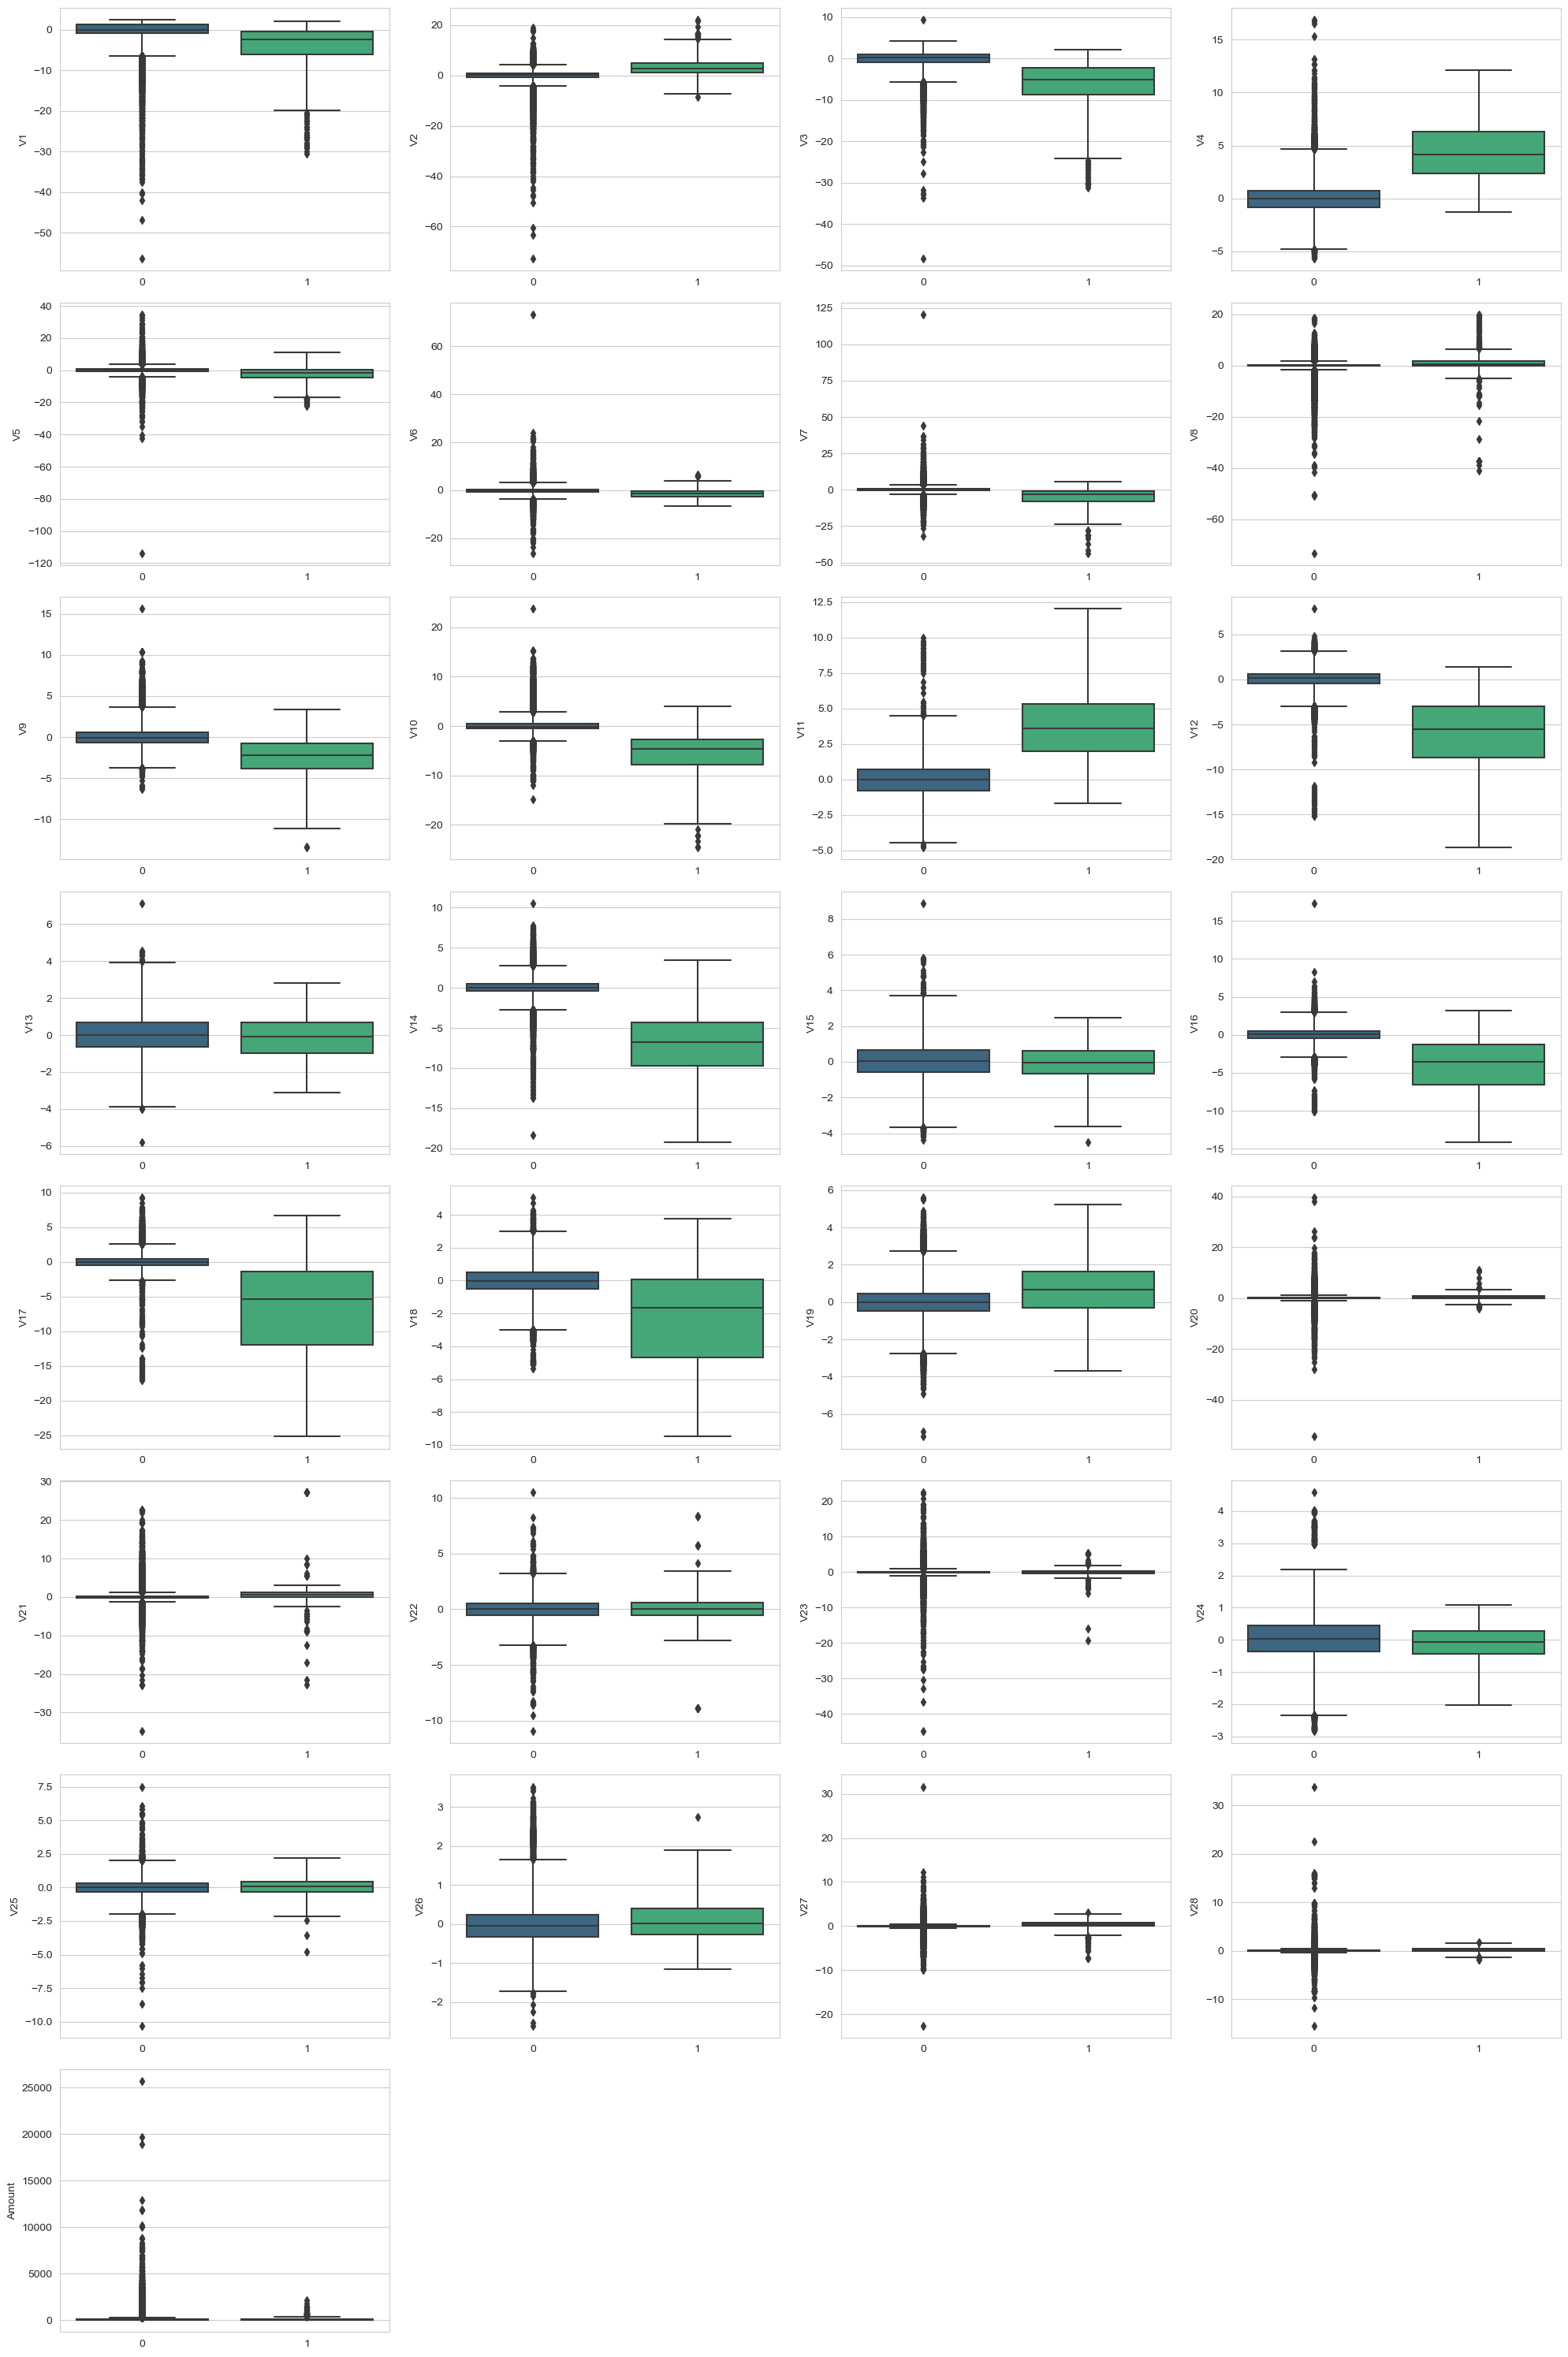

In [40]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)

# loop through the length of tickers and keep track of index
for n, col in enumerate(df2.iloc[:, 1:30].columns):
    # add a new subplot iteratively
    ax = plt.subplot(8, 4, n + 1)

    # filter df2 and plot ticker on the new subplot axis
    sns.boxplot(x="Class",
                y=col,
                data=df2,
                whis=2.5,
                palette="viridis",
                showfliers=True,
#                 showmeans=True,
#                 meanprops={
#                     "marker": "o",
#                     "markerfacecolor": "white",
#                     "markeredgecolor": "black",
#                     "markersize": "10"
#                 },
                ax=ax)

    # chart formatting
#     ax.set_title(ticker.upper())
#     ax.get_legend().remove()
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [41]:
df2.groupby("Class")["V10", "V12", "V14", "V17"].describe().T

Class              0       1
V10 count 283253.000 492.000
    mean       0.008  -5.677
    std        1.036   4.897
    min      -14.741 -24.588
    25%       -0.533  -7.757
    50%       -0.092  -4.579
    75%        0.455  -2.614
    max       23.745   4.031
V12 count 283253.000 492.000
    mean       0.009  -6.259
    std        0.945   4.654
    min      -15.145 -18.684
    25%       -0.403  -8.688
    50%        0.141  -5.503
    75%        0.618  -2.974
    max        7.848   1.376
V14 count 283253.000 492.000
    mean       0.012  -6.972
    std        0.894   4.279
    min      -18.392 -19.214
    25%       -0.423  -9.693
    50%        0.051  -6.730
    75%        0.493  -4.283
    max       10.527   3.442
V17 count 283253.000 492.000
    mean       0.011  -6.666
    std        0.749   6.971
    min      -17.098 -25.163
    25%       -0.483 -11.945
    50%       -0.065  -5.303
    75%        0.399  -1.342
    max        9.254   6.739

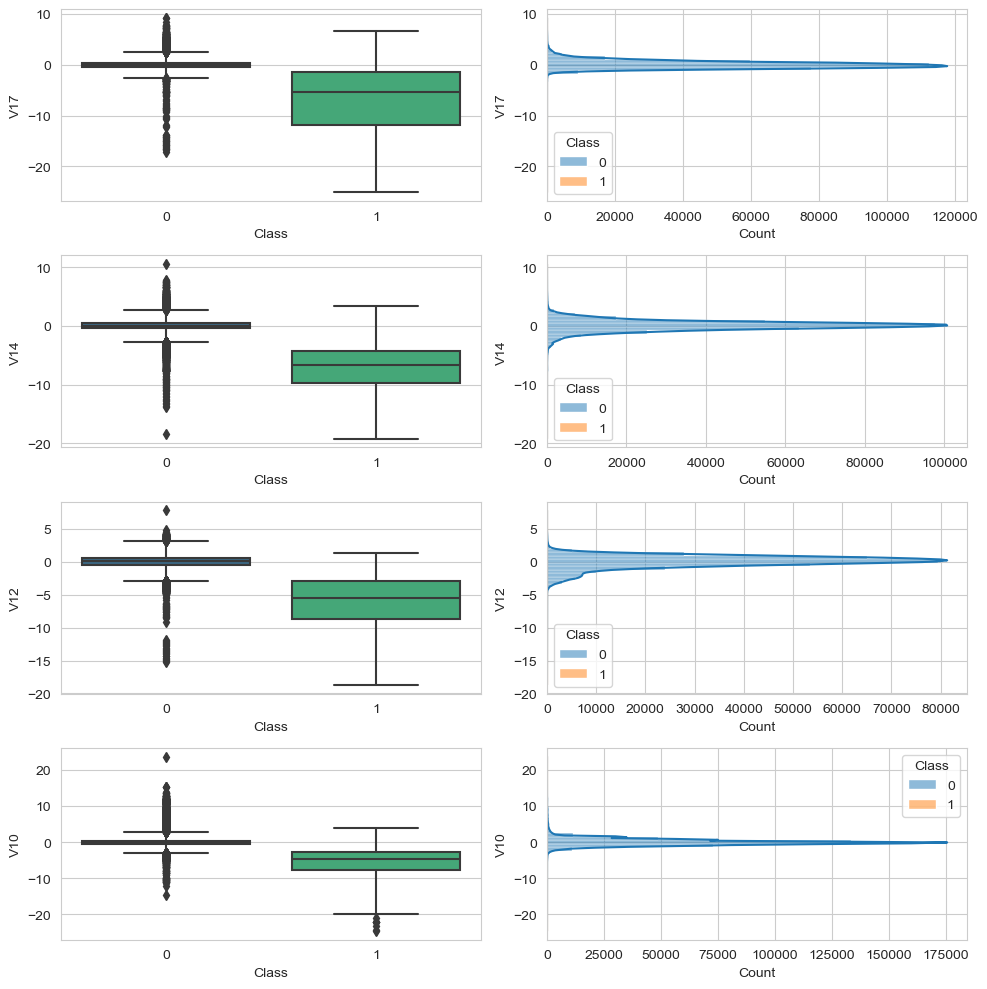

In [42]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[0, 0])
sns.histplot(data=df2, y="V17", bins=50, hue="Class", kde=True, ax=axes[0, 1])

sns.boxplot(x="Class", y="V14", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[1, 0])
sns.histplot(data=df2, y="V14", bins=50, hue="Class", kde=True, ax=axes[1, 1])


sns.boxplot(x="Class", y="V12", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[2, 0])
sns.histplot(data=df2, y="V12", bins=50, hue="Class", kde=True, ax=axes[2, 1])


sns.boxplot(x="Class", y="V10", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[3, 0])
sns.histplot(data=df2, y="V10", bins=50, hue="Class", kde=True, ax=axes[3, 1])

plt.tight_layout()
plt.show()

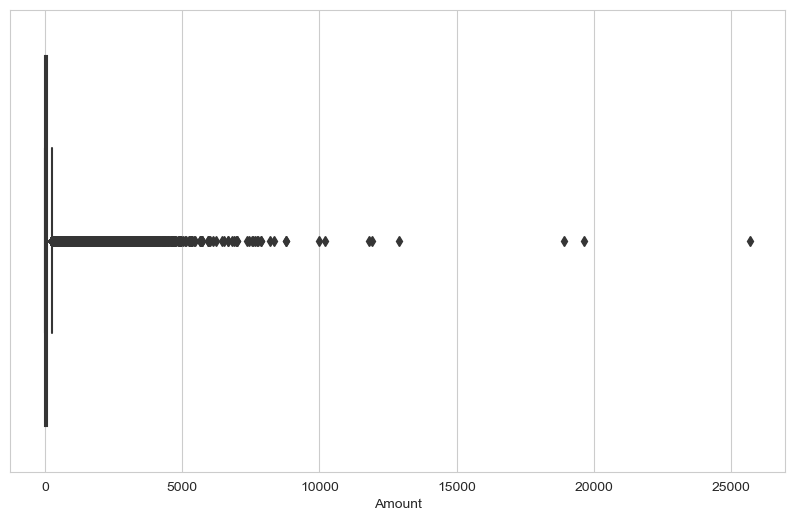

In [43]:
sns.boxplot(x="Amount", data=df2, palette="viridis", whis=2.5, showfliers=True);

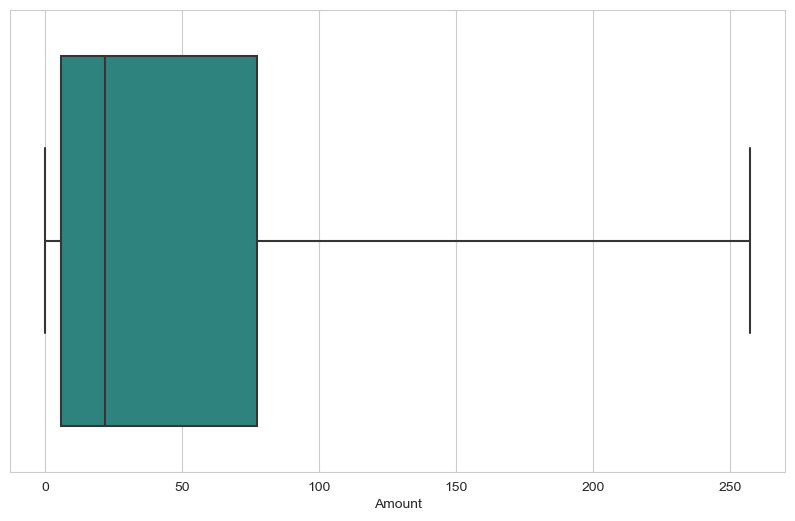

In [44]:
sns.boxplot(x="Amount", data=df2, palette="viridis", whis=2.5, showfliers=False);

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [ ]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

#from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

#sklearn modules for Model Selection:
#from sklearn import svm, tree, linear_model, neighbors
#from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold
from sklearn import feature_selection
#from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

#### Scaling

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Model Training***

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

***ii. Model Training***

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iv.  Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___